## Participants based analysis

In [1]:
import numpy as np
import pandas as pd
import openai

In [3]:
df = pd.read_csv('~/knowledge-explore/data/processed_data/reference_dataset_v1.csv')

In [4]:
len(df['participant_id'].unique())

300

In [5]:
df.head(5)

,Unnamed: 0,problem_id,participant_id,DAT,CRT2,CURIOSITY_SCORE,AGE,GENDER,EDUCATION,EMPLOYMENT,...,POLITICAL,CLIMATE,COVID,NEWS,MEDIA,RELATION_KNOWLEDGE,RELATION_INTEREST,RELATION_CONCERN,ideas,emb_ideas
0,0,Q1,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,2,4,4,"['vaccination schemes in these areas', 'increa...","[[-0.011656875722110271, -0.019422005861997604..."
1,1,Q2,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,['equal pay for women and men in the same role...,"[[-0.0034376916009932756, 0.006209875456988811..."
2,2,Q3,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['look into conservation plans ', 'ensure poac...","[[0.03516001999378204, -0.004544570576399565, ..."
3,3,Q4,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,4,3,"['make it more affordable ', 'make it more rel...","[[-0.0006349863833747804, -0.02672582119703293..."
4,4,Q5,00278,74.104969,3,4.229167,24,1,5,1,...,2,1,1,4,5,3,5,5,"['a better work-life balance ', 'more flexible...","[[0.01157371699810028, 0.009878437966108322, 0..."


In [6]:
df = df.rename(columns = {'participant_id': 'PARTICIPANT_ID'})
# df = df.set_index('PARTICIPANT_ID')

In [7]:
df_3_whole = df.loc[df['problem_id'] == 'Q3'][['PARTICIPANT_ID','ideas', 'emb_ideas']]


In [8]:
df_3 = df_3_whole[['PARTICIPANT_ID','ideas']]

In [9]:
# idea values are stored as string, not the list. So str -> list
import ast
df_3['ideas']= df_3['ideas'].map(ast.literal_eval)

# unlist and make new rows
df_3 = df_3.explode('ideas')


/tmp/ipykernel_1585516/1535057389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['ideas']= df_3['ideas'].map(ast.literal_eval)


In [10]:
# delete the second level of index and concatenate only with the first one.
df_3 = df_3.set_index('PARTICIPANT_ID')
# sort the dataframe by the participant id
df_3 = df_3.sort_index()

In [11]:
df_3 = df_3.squeeze()

In [12]:
df_3

PARTICIPANT_ID
00278                        look into conservation plans 
00278           ensure poachers are prosecuted and stopped
00278                   protect the land they live off of 
00278       have protected areas that people cannot access
00278    stop them being used for human entertainment/t...
                               ...                        
fb9c4    prosecute those who profit of elephants in so ...
fb9c4    create a scheme to impregnate a lot of female ...
ff2bf                            ban ivory imports/exports
ff2bf                            try to breed in captivity
ff2bf                          protected elephant colonies
Name: ideas, Length: 1330, dtype: object

## Preprocessing the text

0. null values
1. non-english answers
2. drop stopwords
3. lemmatization 

### Null values handling

In [13]:
print(df_3.info(), '\n')

<class 'pandas.core.series.Series'>
Index: 1330 entries, 00278 to ff2bf
Series name: ideas
Non-Null Count  Dtype 
--------------  ----- 
1330 non-null   object
dtypes: object(1)
memory usage: 53.1+ KB
None 



## Question 3

In [14]:
# Data cleaning & preprocessing
import nltk
import re
from nltk.corpus import stopwords

# Lemmatizer modules
from nltk.stem import WordNetLemmatizer

### Make lower case, drop stopwords

In [15]:
# define the dataframe for preprocessing
data = df_3.copy()

In [16]:
len(data)

1330

In [17]:
data.index

Index(['00278', '00278', '00278', '00278', '00278', '0068d', '0068d', '0068d',
       '0068d', '0068d',
       ...
       'fb2a2', 'fb2a2', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'fb9c4', 'ff2bf',
       'ff2bf', 'ff2bf'],
      dtype='object', name='PARTICIPANT_ID', length=1330)

In [18]:
import re
# Remove special characters, lower the cases, remove stopwords.

# dictionary to contain
new_dict = {new_list: [] for new_list in data.index}

# list of index
ind_list = data.index.to_list()

# preprocess - remove special character, lower case, drop stopwords
for i in range(len(data)): 
    
    text = data.iloc[i]
    
    temp = re.sub('\W+', " ", text)
    temp = temp.lower()
    temp = temp.split()
    temp = [word for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    
    new_dict[ind_list[i]].append(temp)

### Lemmatization

In [19]:
# This seems very plausible for the lemmatization.
for a in new_dict.items(): 
    print(a[1])

['look conservation plans', 'ensure poachers prosecuted stopped', 'protect land live', 'protected areas people cannot access', 'stop used human entertainment tourism']
['hefty fines', 'long prison sentences', 'educating schoolchildren', 'include local villagers tuition villagers', 'control border crossing checks']
['punishing poachers', 'armed guards around habitats', 'incentivising protection elephants', 'make ivory worthless', 'introduce breeding project']
['safe living areas', 'tourist based funding', 'preservation areas', 'scented candles', 'breeding programme']
['ban hunting elephants', 'create sanctuaries elephants', 'give elephants protected species status', 'disturbing natural habitat elephants', 'displacing elephants putting zoos circus']
['tv advert', 'ask donations', 'get celebraty indorse project', 'report major newspapers', 'educate elephants threat extinction']
['protections', 'harsher punishments kill', 'ban people coming near', 'environment protection', 'answers ai']
['

In [20]:
# Lemmatizer modules
lemmatizer = WordNetLemmatizer()

In [21]:
for pair in new_dict.items():
    new_dict[pair[0]] = [lemmatizer.lemmatize(answer) for answer in pair[1]]

In [22]:
result_df = pd.DataFrame.from_dict(new_dict, orient='index').T.stack()

In [23]:
result_df = result_df.reset_index(level=0, drop=True)

In [24]:
result_df = result_df.sort_index()

In [25]:
# Replace the df_1 with the dataframe containing processed data.
df_3 = result_df

In [26]:
df_3 = pd.DataFrame(df_3, columns = ['q3'])

## Delete the empty value indices 

In [27]:
for i in range(len(df_3)): 
    if df_3['q3'].iloc[i] == '': 
        print(i)

## Embedding analysis

In [28]:
# After 'expand', the column emb_ideas are stored as string -> np.array
df_3_whole['emb_ideas'] = df_3_whole['emb_ideas'].apply(eval).apply(np.array)

In [29]:
# Extract the column needed for embedding analysis.
emb_3 = df_3_whole[['PARTICIPANT_ID', 'emb_ideas']]

In [30]:
emb_3 = emb_3.reset_index(drop = True)

In [31]:
emb_3

,PARTICIPANT_ID,emb_ideas
0,00278,"[[0.03516001999378204, -0.004544570576399565, ..."
1,0068d,"[[0.010956131853163242, -0.004035493358969688,..."
2,00f13,"[[0.026723945513367653, 0.0026687385980039835,..."
3,01cb6,"[[0.004764847457408905, -0.013441885821521282,..."
4,02670,"[[0.01575230248272419, -0.011049142107367516, ..."
...,...,...
294,f92a4,"[[0.006696878932416439, 0.0011165362084284425,..."
295,f9fd8,"[[0.006908088456839323, -0.024523714557290077,..."
296,fb2a2,"[[0.02998393028974533, -0.004912570118904114, ..."
297,fb9c4,"[[0.051104817539453506, 0.005594604182988405, ..."


In [32]:
# check if the type change has been successful to be np.array
type(emb_3['emb_ideas'][0])

numpy.ndarray

In [33]:
emb_3 = emb_3.rename(columns = {'PARTICIPANT_ID': 'index', 'emb_ideas': 'q3_emb'})

In [34]:
emb_3

,index,q3_emb
0,00278,"[[0.03516001999378204, -0.004544570576399565, ..."
1,0068d,"[[0.010956131853163242, -0.004035493358969688,..."
2,00f13,"[[0.026723945513367653, 0.0026687385980039835,..."
3,01cb6,"[[0.004764847457408905, -0.013441885821521282,..."
4,02670,"[[0.01575230248272419, -0.011049142107367516, ..."
...,...,...
294,f92a4,"[[0.006696878932416439, 0.0011165362084284425,..."
295,f9fd8,"[[0.006908088456839323, -0.024523714557290077,..."
296,fb2a2,"[[0.02998393028974533, -0.004912570118904114, ..."
297,fb9c4,"[[0.051104817539453506, 0.005594604182988405, ..."


### Aggregate within the dataframe first and then join together

In [35]:
# question 3
df = emb_3[['index', 'q3_emb']]

# Flatten the embedding 5 * 1536 -> 1 * 1536
df['q3_emb'] = df['q3_emb'].apply(np.mean, axis = 0)
emb_3 = df.reset_index(drop = True)

emb_3 = emb_3.rename(columns = {'q3_emb': 'q3'})

## Analysis within question

### Question 3
"How could we prevent the extinction of the elephant?"

In [36]:
# convert list to numpy array to make an input to embeddings
emb_3['q3'] = emb_3['q3'].apply(np.array)  
matrix = np.vstack(emb_3['q3'].values)
matrix.shape

(299, 1536)

In [37]:
X = matrix.copy()

## Dimensionality reduction (umap)

In [41]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from umap import UMAP

In [42]:
# Step 1: Normalize the data
from sklearn.preprocessing import StandardScaler
normalized_embeddings = StandardScaler().fit_transform(X)

In [43]:
# Step 2: Apply UMAP for dimensionality reduction
umap_model = UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state = 42)
umap_embeddings = umap_model.fit_transform(normalized_embeddings)
X = umap_embeddings.copy()

In [44]:
# Step 3: Use silhouette score to find optimal number of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

The last line derives from the fact that silhouette score is calculated from the num_cluster 2, so therefore if retrieving index of the lists, the first element's index is 0 but it indicates the value of num_cluster 2, therefore +2 would make it easier to retrieve the value. 


In [45]:
optimal_num_clusters

2

In [46]:
# Use Elbow-analysis as well to find optimal number of clusters
# Elbow analysis
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(np.sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = np.sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

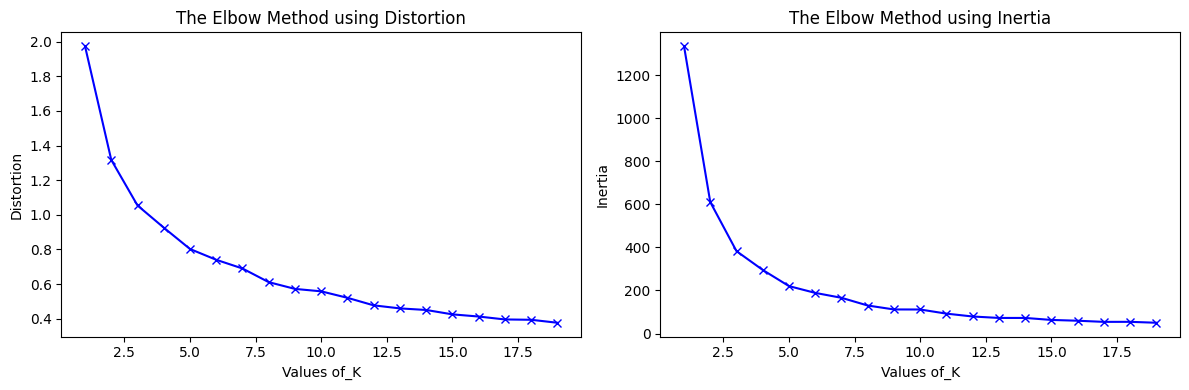

In [47]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot the first plot on ax1
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('Values of_K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')


# Plot the second plot on ax2
ax2.plot(K, inertias, 'bx-')
ax2.set_xlabel('Values of_K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

Define the number of clusters for the clustering method combining the result of the graphs and the value of variable optimal_num_clusters

## KMeans clustering

In [48]:
# Step 4: Perform final clustering
final_kmeans = KMeans(n_clusters=4, random_state=0) # random_state fixed to 0, n_cluster changed
final_cluster_labels = final_kmeans.fit_predict(X)

# Save the result of clustering with random state 0 as a dataframe column
emb_3['label'] = final_cluster_labels  

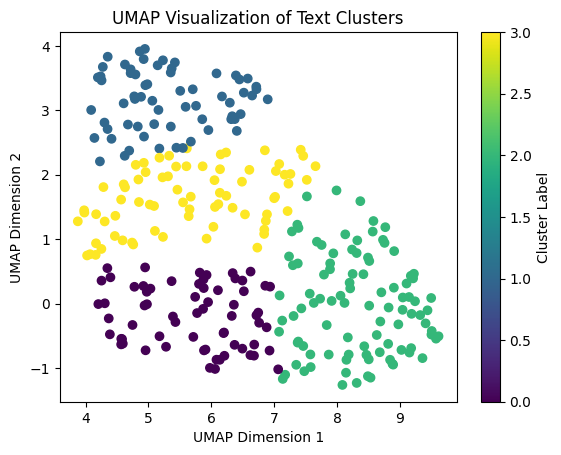

In [49]:
# Visualize clustering depending on different random states.
figures = [] # list to hold different figures. 

fig1, ax1 = plt.subplots()
scatter = ax1.scatter(X[:, 0], X[:, 1], c=final_cluster_labels, cmap='viridis')
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('UMAP Visualization of Text Clusters')

colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Label')

figures.append(fig1)

In [50]:
# Cluster labels obtained from clustering algorithm

final_cluster_labels # cluster_labels_from_bert
X # contextualized tokens of the input texts.

# Specify the question that is addressed. 
print("\n\"Question 3\"\n")

# Calculate Silhouette Coefficient
silhouette = silhouette_score(X, final_cluster_labels)
print(f"Silhouette Coefficient: {silhouette}")

# Calculate Calinski-Harabasz Index
calinski = calinski_harabasz_score(X, final_cluster_labels)
print(f"Calinski-Harabasz Index: {calinski}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X, final_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


"Question 3"

Silhouette Coefficient: 0.3769693076610565
Calinski-Harabasz Index: 314.45299131521193
Davies-Bouldin Index: 1.0603526498356466
